In [23]:
# Setup and imports ---
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# --- Cell 2: Load the cleaned dataset ---
df = pd.read_csv("../data/cleaned/all_regions.csv", parse_dates=["Date"])

# Display first few rows to inspect structure
df.head()

,Date,Region,Precipitation,River_Level,Elevation_m,Slope_deg,Drainage_Density,Dist_to_River_km,Soil_Type,Land_Cover,...,Elevation_m_norm,Drainage_Density_norm,Precipitation_norm_norm,River_Level_norm_norm,Slope_deg_norm_norm,Dist_to_River_km_norm_norm,TWI_norm_norm,NDVI_norm_norm,Lake_Level_norm,Dam_Level_norm
0,2015-01-01,Ak-Suu,0.000000,1.674161,1600,8.0,1.4,0.7,sandy_loam,mountain_forest,...,0.4,0.214286,0.000000,0.076046,0.0,0.0,0.0,0.0,0.45648,0.620968
1,2015-01-02,Ak-Suu,6.378744,2.825170,1600,8.0,1.4,0.7,sandy_loam,mountain_forest,...,0.4,0.214286,0.250835,0.150137,0.0,0.0,0.0,0.0,0.45648,0.620968
2,2015-01-03,Ak-Suu,0.661352,3.003257,1600,8.0,1.4,0.7,sandy_loam,mountain_forest,...,0.4,0.214286,0.026007,0.161601,0.0,0.0,0.0,0.0,0.45648,0.620968
3,2015-01-04,Ak-Suu,3.865727,3.360715,1600,8.0,1.4,0.7,sandy_loam,mountain_forest,...,0.4,0.214286,0.152014,0.184611,0.0,0.0,0.0,0.0,0.45648,0.620968
4,2015-01-05,Ak-Suu,3.244595,3.141330,1600,8.0,1.4,0.7,sandy_loam,mountain_forest,...,0.4,0.214286,0.127589,0.170489,0.0,0.0,0.0,0.0,0.45648,0.620968


In [25]:
# --- Cell 3: Dataset overview ---
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)

# Check missing values per column
print("Missing values per column:")
print(df.isna().sum())

# Check distribution of the target variable
target_dist = df['Flood_Status'].value_counts(normalize=True)
print("Flood_Status distribution (normalized):\n", target_dist)

Dataset shape: (96448, 32)
Columns: ['Date', 'Region', 'Precipitation', 'River_Level', 'Elevation_m', 'Slope_deg', 'Drainage_Density', 'Dist_to_River_km', 'Soil_Type', 'Land_Cover', 'TWI', 'NDVI', 'Precipitation_norm', 'River_Level_norm', 'Slope_deg_norm', 'Dist_to_River_km_norm', 'TWI_norm', 'NDVI_norm', 'risk_score', 'Flood_Status', 'Lake_Level', 'Dam_Level', 'Elevation_m_norm', 'Drainage_Density_norm', 'Precipitation_norm_norm', 'River_Level_norm_norm', 'Slope_deg_norm_norm', 'Dist_to_River_km_norm_norm', 'TWI_norm_norm', 'NDVI_norm_norm', 'Lake_Level_norm', 'Dam_Level_norm']
Data types:
 Date                          datetime64[ns]
Region                                object
Precipitation                        float64
River_Level                          float64
Elevation_m                            int64
Slope_deg                            float64
Drainage_Density                     float64
Dist_to_River_km                     float64
Soil_Type                             obj

In [26]:
# --- Cell 4: Date range by region ---
print("Date range per region (sample):")
for region in df['Region'].unique()[:5]:
    sub = df[df['Region'] == region]
    print(f"{region}: {sub['Date'].min().date()} to {sub['Date'].max().date()}")


Date range per region (sample):
Ak-Suu: 2015-01-01 to 2020-12-31
Ak-Talaa: 2015-01-01 to 2020-12-31
Aksy: 2015-01-01 to 2020-12-31
Ala-Buka: 2015-01-01 to 2020-12-31
Alamudün: 2015-01-01 to 2020-12-31


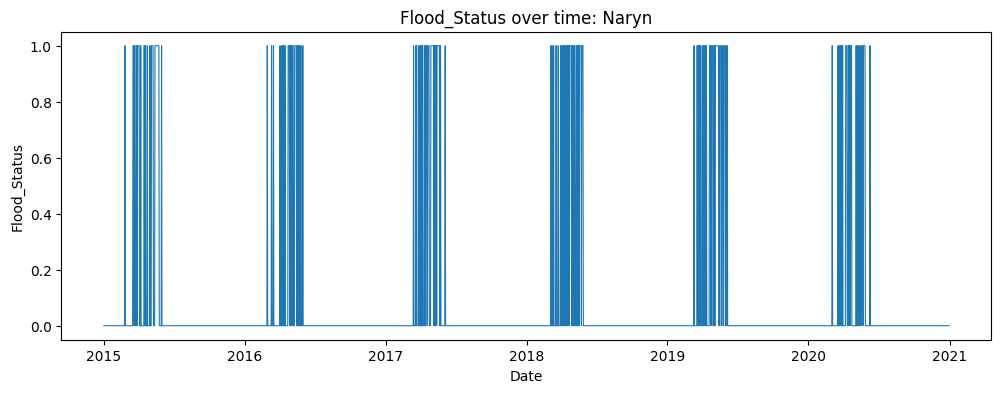

In [27]:
# --- Cell 5: Temporal visualization of Flood_Status for a sample region ---
region_sample = 'Naryn'
sub = df[df['Region'] == region_sample]
plt.figure(figsize=(12, 4))
plt.plot(sub['Date'], sub['Flood_Status'], lw=0.8)
plt.title(f"Flood_Status over time: {region_sample}")
plt.xlabel("Date")
plt.ylabel("Flood_Status")
plt.show()

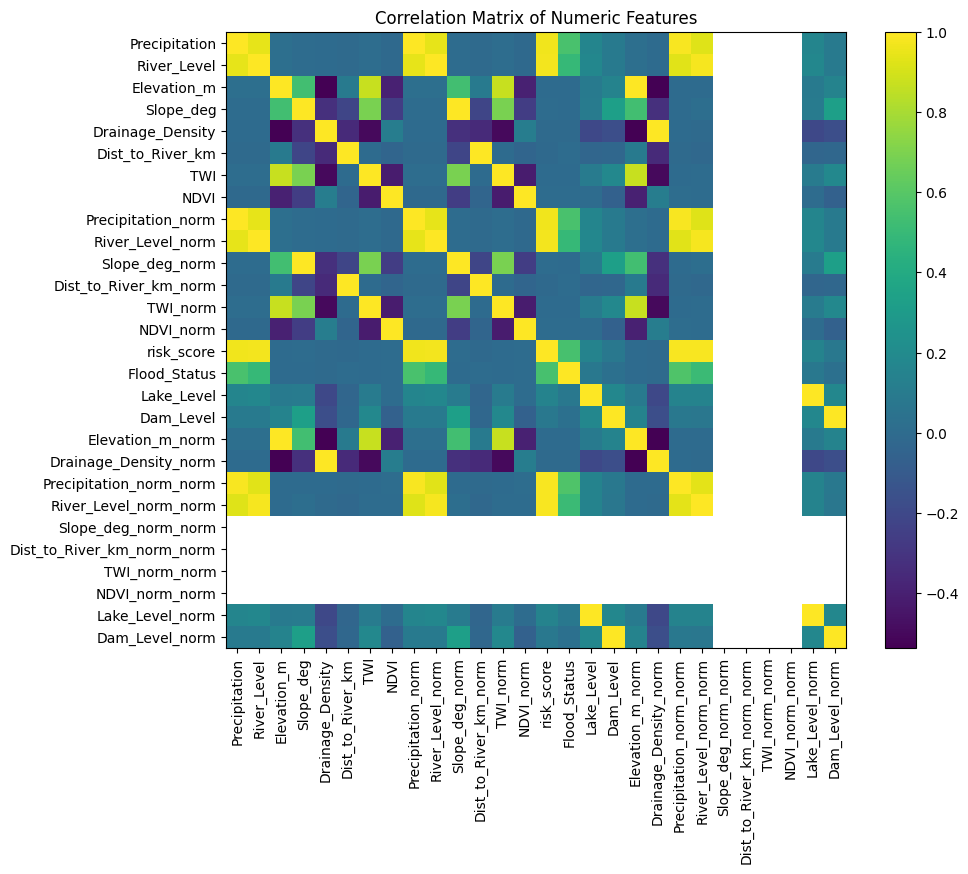

In [28]:
# --- Cell 6: Correlation matrix of numeric features ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

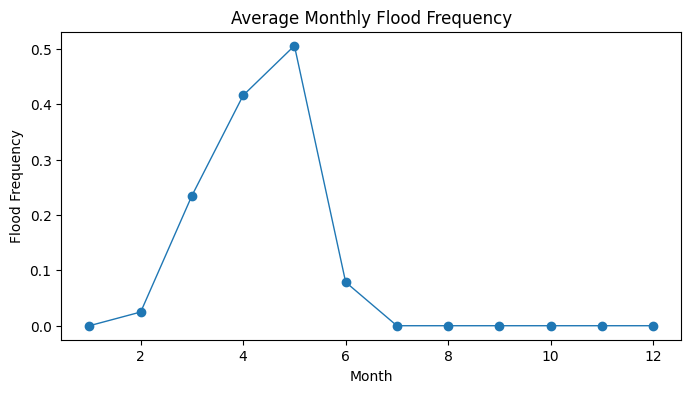

In [29]:
# --- Cell 7: Monthly flood frequency ---
df['Month'] = df['Date'].dt.month
monthly_freq = df.groupby('Month')['Flood_Status'].mean()

plt.figure(figsize=(8, 4))
plt.plot(monthly_freq.index, monthly_freq.values, marker='o', lw=1)
plt.title("Average Monthly Flood Frequency")
plt.xlabel("Month")
plt.ylabel("Flood Frequency")
plt.show()

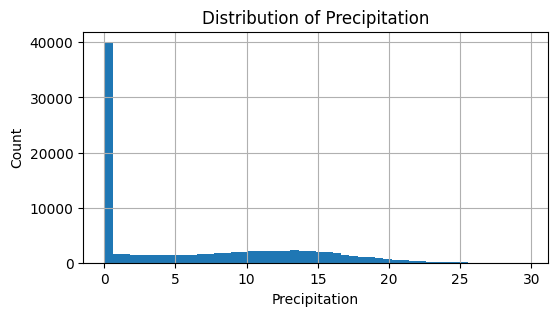

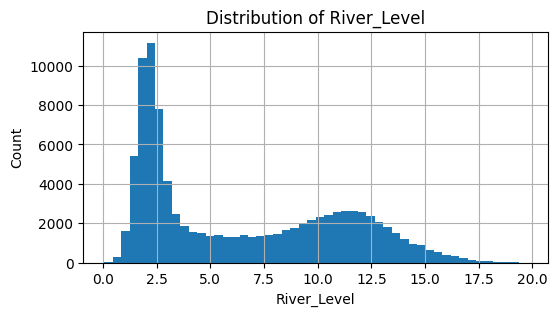

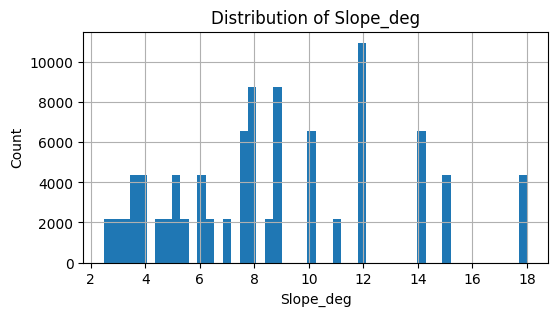

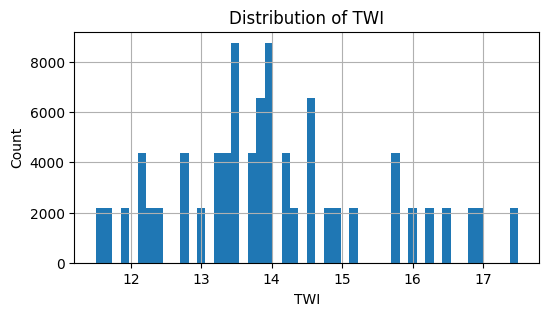

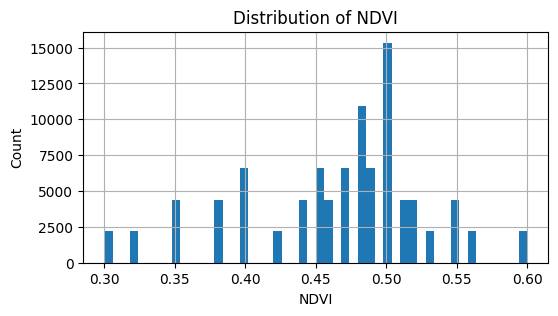

In [30]:
# --- Cell 8: Distribution of key predictive features ---
features = ['Precipitation', 'River_Level', 'Slope_deg', 'TWI', 'NDVI']
for feat in features:
    plt.figure(figsize=(6, 3))
    df[feat].hist(bins=50)
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.show()


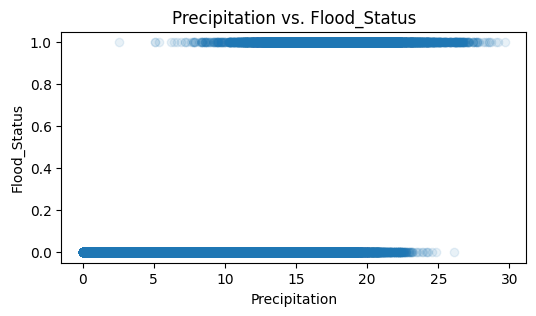

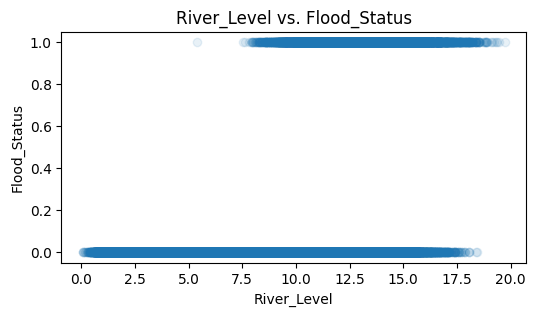

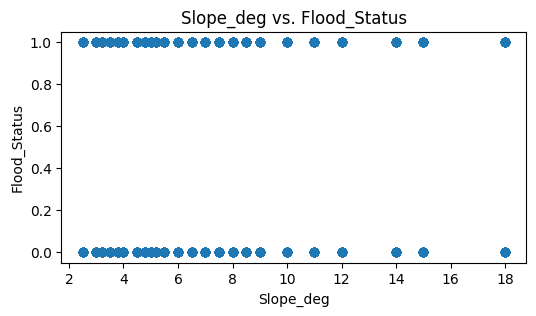

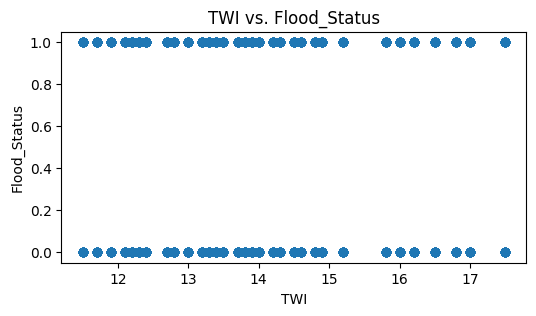

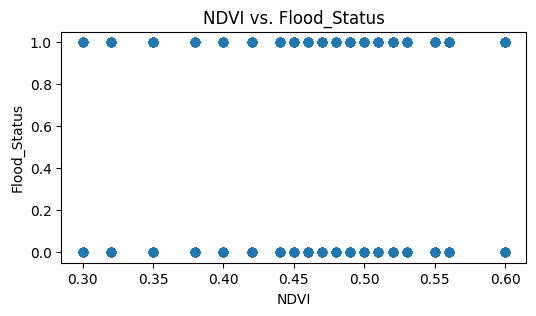

In [31]:
# --- Cell 9: Scatter plots of features vs. Flood_Status ---
for feat in features:
    plt.figure(figsize=(6, 3))
    plt.scatter(df[feat], df['Flood_Status'], alpha=0.1)
    plt.title(f"{feat} vs. Flood_Status")
    plt.xlabel(feat)
    plt.ylabel("Flood_Status")
    plt.show()